In [41]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [43]:
data.shape

(917, 20)

In [44]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [45]:
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [46]:
data['CNEN'].value_counts()

CNEN
Khlong Saen Saep                               33
Khlong Prem Prachakorn                         24
Khlong Chong Nonsi                             18
Khlong Rob Krung                               18
Khlong Phlapphla                               18
                                               ..
Khlong Bang Luang                               1
Khlong Phra Rajadamri 1 (Khlong Bueng Phai)     1
Khlong Phraya Suren                             1
Orachon Canal                                   1
Khlong Tanod                                    1
Name: count, Length: 168, dtype: int64

**Data Preprocessing**

In [47]:
data.describe()

,Index,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,9.170000e+02
mean,459.000000,729.759324,2562.008724,28.694329,7.242007,1.667045,0.179804,12.802672,64.103762,21.953719,7.999945,4.358997,0.146205,2.123228,0.947895,2.181025e+118
std,264.859397,553.978537,0.820008,1.845115,0.462830,1.282984,0.389665,9.397183,22.350496,17.194847,5.133194,3.600244,0.131068,0.692240,0.519764,6.604582e+119
min,1.000000,12.000000,2561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,230.000000,221.000000,2561.000000,28.500000,7.130000,0.510000,0.000000,6.250000,51.000000,12.000000,4.100000,1.500000,0.020000,1.700000,0.520000,1.220000e+08
50%,459.000000,591.000000,2562.000000,29.000000,7.290000,1.600000,0.000000,9.800000,60.500000,17.000000,7.100000,3.460000,0.110000,2.000000,0.900000,1.530000e+10
75%,688.000000,1191.000000,2563.000000,29.300000,7.400000,2.600000,0.200000,15.830000,72.100000,26.000000,10.800000,6.100000,0.210000,2.500000,1.250000,2.100000e+12
max,917.000000,1822.000000,2563.000000,31.900000,9.100000,9.700000,5.000000,84.500000,202.000000,148.300000,39.800000,23.330000,0.730000,8.600000,3.530000,2.000000e+121


Check for column types.

In [48]:
data.dtypes

Index      int64
CID      float64
Year       int64
CN        object
WSP       object
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Drop unnecessary columns from the dataset.

In [49]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [50]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Check for null values in the dataset.

In [51]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [52]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,"Mother Earth Muay Hair Monument, Sanam Luang",Khlong Khu Mueang Derm
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,Phra Pinklao Police Station,Khlong Khu Mueang Derm
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,Bridge in front of the Ministry of Interior,Khlong Khu Mueang Derm


In [53]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [54]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

In [55]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [56]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

In [57]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN      int64
CNEN       int64
dtype: object

In [58]:
data.head(3)

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61


**Feature Engineering**

Here lets engineer a new feature called ISQA (Simple Water Quality Index) using the formula 
- ISQA = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [59]:
# data["TDS"] = (
#     0.6 * data["NO3N"] +
#     0.8 * data["NO2N"] +
#     0.5 * data["TKN"] +
#     0.7 * data["AN"] + #NH3N
#     0.9 * data["TP"] +
#     0.05 * data["SS"]
# )

# data['TDS'] = data['TDS'] * 50  #tuned for COND 200–1500 μS/cm
# data['COND'] = 0.7 * data['TDS']

In [60]:
# data['COND'].describe()

In [61]:

# Calculate TDS and COND
data['TDS'] = (
    0.6 * data['NO3N'] +
    0.8 * data['NO2N'] +
    0.5 * data['TKN'] +
    0.7 * data['AN'] +
    0.9 * data['TP']
)


# Scale TDS for realistic COND (200–1500 μS/cm)
data['TDS'] = data['TDS'] * 50
data['COND'] = 0.7 * data['TDS']

def calculate_isqa(row):
    # Extract parameters from the row
    temperature = row['Temp']
    bod = row['BO']
    tss = row['SS']
    do = row['DO']
    cond = row['COND']
    
    # Temperature Index (ITEMP)
    if temperature <= 20:
        itemp = 1
    else:
        itemp = max(0, 1 - 0.05 * (temperature - 20))
    
    # Biological Oxygen Demand Index (IBOD)
    if bod == 0:
        ibod = 30
    elif 0 < bod <= 12:
        ibod = max(0, 30 - 2.5 * bod)
    else:
        ibod = 0
    
    # Total Suspended Solids Index (ITSS)
    if tss == 0:
        itss = 25
    elif 0 < tss <= 250:
        itss = max(0, 25 - 0.1 * tss)
    else:
        itss = 0
    
    # Dissolved Oxygen Index (IDO)
    if do >= 10:
        ido = 25
    elif 0 < do < 10:
        ido = 2.5 * do
    else:
        ido = 0
    
    # Conductivity Index (ICOND)
    if cond <= 200:
        icond = 20
    elif 200 < cond <= 4000:
        icond = max(0, 20 - (20 / 3800) * (cond - 200))
    else:
        icond = 0
    
    # ISQA Calculation
    isqa = itemp * (ibod + itss + ido + icond)
    return isqa

data['ISQA'] = data.apply(calculate_isqa, axis=1)

In [62]:
data['ISQA'].describe()

count    917.000000
mean      30.035712
std        6.566263
min       16.112684
25%       24.683116
50%       29.271258
75%       34.832976
max       75.000000
Name: ISQA, dtype: float64

In [63]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize Min-Max Scaler
# scaler = MinMaxScaler()

# columns_to_normalize = ["Temp", "BO", "SS", "DO"]
# data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# # Calculate ISQA
# def calculate_isqa(row):
#     isqa = row["Temp"] * (row["BO"] + row["SS"] + row["DO"] + row["COND"])
#     return isqa


# data["ISQA"] = data.apply(calculate_isqa, axis=1)
# # Rescale ISQA to be between 0 and 100
# scaler_isqa = MinMaxScaler(feature_range=(0, 100))

# # Reshape ISQA column to 2D for scaling
# data["ISQA"] = scaler_isqa.fit_transform(data["ISQA"].values.reshape(-1, 1))

# # Show the first few rows of the ISQA column
# print(data["ISQA"].head())


In [64]:
data['ISQA'].describe()

count    917.000000
mean      30.035712
std        6.566263
min       16.112684
25%       24.683116
50%       29.271258
75%       34.832976
max       75.000000
Name: ISQA, dtype: float64

In [65]:
# # From water quality index (WQI) calculate potability and classify as 2 (safe), 1 (potentially unsafe), 0(unsafe)
# def calc_water_potability(m):
#     if m > 75:
#         return 2
    
#     if m > 50:
#         return 1
    
#     return 0

# data['target'] = data['ISQA'].apply(calc_water_potability)
# data['target'].value_counts()

Box plot of `target` variable and `NO2N` value of water.

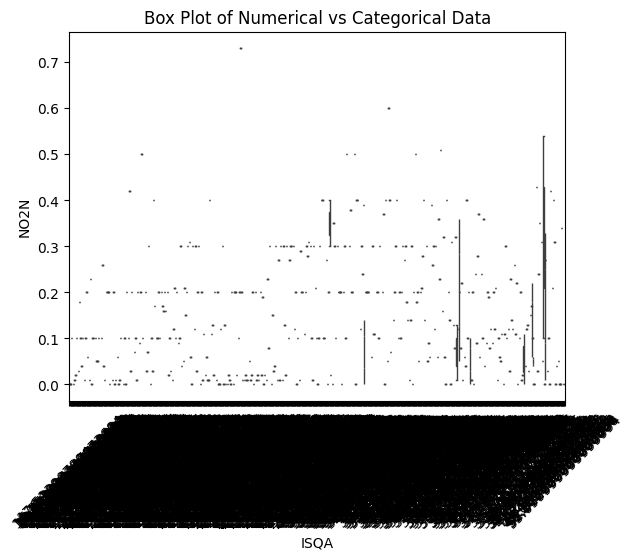

In [66]:
sns.boxplot(x='ISQA', y='NO2N', data=data)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical vs Categorical Data')
plt.show()

Swarm plot for numerical data `pH` and categorical data `target`

/home/puskr/ml_project/ml-project-water-potability/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/puskr/ml_project/ml-project-water-potability/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


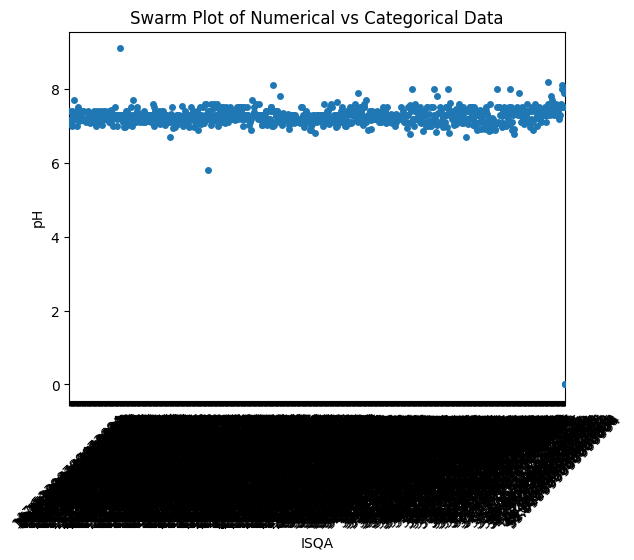

In [67]:
sns.swarmplot(x='ISQA', y='pH', data=data)
plt.xticks(rotation=45)
plt.title('Swarm Plot of Numerical vs Categorical Data')
plt.show()

Pair plot between ph value of water and Ammonia Nitrate in water.

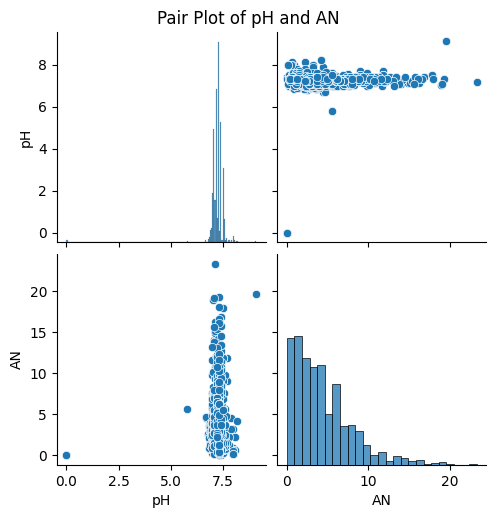

In [68]:
sns.pairplot(data=data[['pH', 'AN']])
plt.suptitle('Pair Plot of pH and AN', y=1.02)
plt.show()

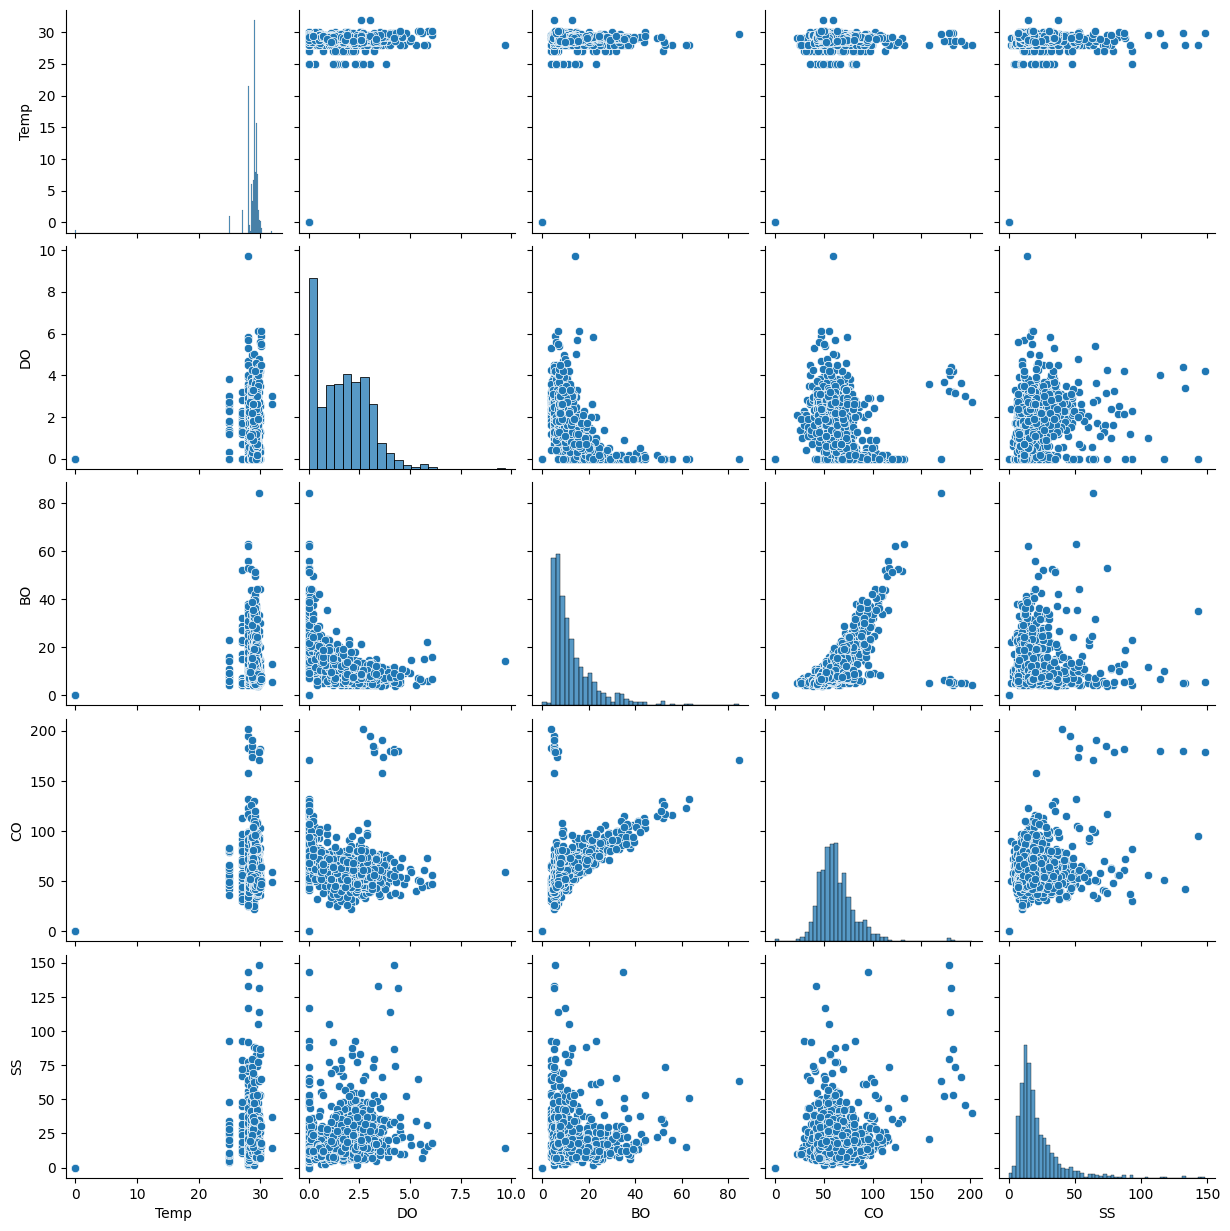

In [69]:
feats = data[['Temp', 'DO', 'BO', 'CO', 'SS']]

sns.pairplot(feats, diag_kind='hist')

In [70]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(data=data.drop(columns=['CID', 'BO', 'SS', 'Temp', 'DO']).corr(numeric_only=True), annot=True)
# plt.show()

In [71]:
data['ISQA'].value_counts()

ISQA
75.000000    3
35.695000    3
38.998400    2
38.940000    2
35.282500    2
            ..
38.865400    1
28.605035    1
27.595995    1
27.101477    1
32.723695    1
Name: count, Length: 902, dtype: int64

In [72]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN', 'TDS', 'COND', 'ISQA'],
      dtype='object')

**Feature Selection**

In [73]:
# df = data[ ['pH', 'CO', 'SS', 'AN', 'NO3N', 'TP', 'TC'] ].copy()

# # y = data['ISQA']

In [74]:
# import pandas as pd
# import numpy as np

# # Samp

# # Sub-index functions (based on WHO/EPA thresholds)
# def q_DO(do):
#     if do >= 8: return 100
#     if 5 < do < 8: return 100 - ((8 - do) / 3) * 50
#     return 0

# def q_pH(ph):
#     if 7 <= ph <= 8: return 100
#     if 6.5 <= ph < 7 or 8 < ph <= 8.5: return 100 - (abs(ph - 7.5) / 1) * 50
#     return 0

# def q_BO(bo):
#     if bo <= 3: return 100
#     if 3 < bo <= 6: return 100 - ((bo - 3) / 3) * 50
#     return 0

# def q_CO(co):
#     if co <= 10: return 100
#     if 10 < co <= 20: return 100 - ((co - 10) / 10) * 50
#     return 0

# def q_SS(ss):
#     if ss <= 20: return 100
#     if 20 < ss <= 50: return 100 - ((ss - 20) / 30) * 50
#     return 0

# def q_AN(an):
#     if an <= 0.1: return 100
#     if 0.1 < an <= 0.5: return 100 - ((an - 0.1) / 0.4) * 50
#     return 0

# def q_NO3N(no3):
#     if no3 <= 10: return 100
#     if 10 < no3 <= 20: return 100 - ((no3 - 10) / 10) * 50
#     return 0

# def q_TP(tp):
#     if tp <= 0.02: return 100
#     if 0.02 < tp <= 0.1: return 100 - ((tp - 0.02) / 0.08) * 50
#     return 0

# def q_TC(tc):
#     if tc <= 0: return 100
#     if 0 < tc <= 1000: return 100 - (tc / 1000) * 90
#     return 10

# # Weights (expert-derived, sum to 1)
# weights = {'DO': 0.20, 'pH': 0.12, 'BO': 0.15, 'CO': 0.13, 'SS': 0.10,
#            'AN': 0.10, 'NO3N': 0.10, 'TP': 0.10, 'TC': 0.05}

# # Calculate sub-indices
# df['q_DO'] = df['DO'].apply(q_DO)
# df['q_pH'] = df['pH'].apply(q_pH)
# df['q_BO'] = df['BO'].apply(q_BO)
# df['q_CO'] = df['CO'].apply(q_CO)
# df['q_SS'] = df['SS'].apply(q_SS)
# df['q_AN'] = df['AN'].apply(q_AN)
# df['q_NO3N'] = df['NO3N'].apply(q_NO3N)
# df['q_TP'] = df['TP'].apply(q_TP)
# df['q_TC'] = df['TC'].apply(q_TC)

# # Calculate WQI
# sub_indices = ['q_DO', 'q_pH', 'q_BO', 'q_CO', 'q_SS', 'q_AN', 'q_NO3N', 'q_TP', 'q_TC']
# df['WQI'] = sum(df[qi] * weights[qi[2:]] for qi in sub_indices)

# # Classify
# # def classify_wqi(wqi):
# #     if wqi >= 90: return 'Excellent'
# #     elif wqi >= 70: return 'Good'
# #     elif wqi >= 50: return 'Moderate'
# #     elif wqi >= 25: return 'Poor'
# #     else: return 'Very Poor'

# # df['WQI_Category'] = df['WQI'].apply(classify_wqi)
# print(df[['WQI']].head())

In [75]:
# for col in df.columns:
#     if str(col).startswith("q_"):
#         df = df.drop(columns=[col])

In [76]:
data['TC'] = np.log1p(data['TC'])  # log1p handles zeros safely

In [77]:
data['TC'].describe()

count    917.000000
mean      24.197133
std       13.276684
min        0.000000
25%       18.619532
50%       23.451119
75%       28.372958
max      279.305943
Name: TC, dtype: float64

In [78]:
X = data[ ['CNEN', 'Year', 'pH', 'CO', 'HS', 'TC'] ]

y = data['ISQA']

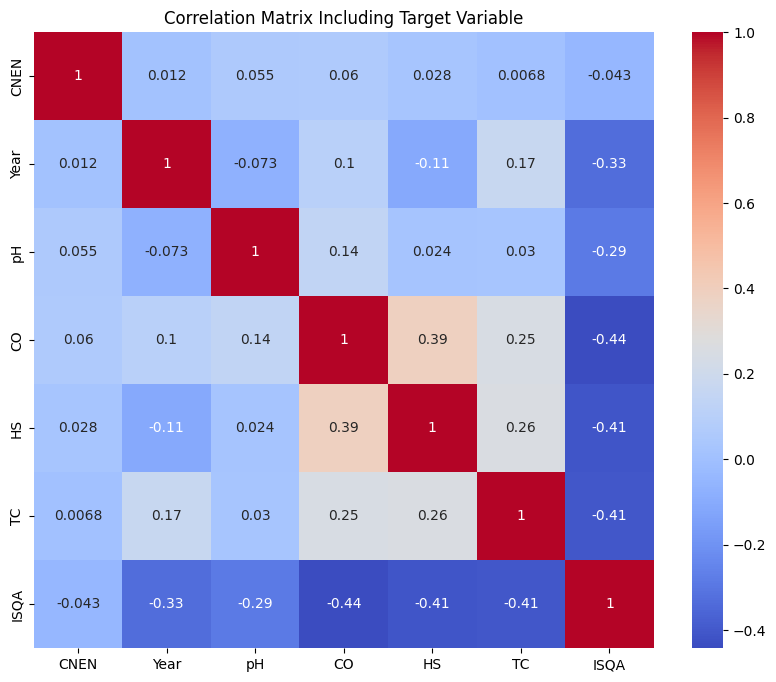

In [79]:
# Compute the correlation matrix
corr_matrix = (pd.concat([X, y], axis=1)).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Including Target Variable")
plt.show()

In [111]:
# from sklearn.utils import resample

# # Separate class 1
# X_class1 = X[y == 1]
# y_class1 = y[y == 1]

# # Upsample class 0 manually (e.g., to 50)
# X_class1_up, y_class1_up = resample(X_class1, y_class1,
#                                     replace=True,
#                                     n_samples=100,
#                                     random_state=42)

# # Combine with rest
# X_rest = X[y != 1]
# y_rest = y[y != 1]

# X = np.vstack((X_rest, X_class1_up))
# y = np.concatenate((y_rest, y_class1_up))

In [112]:
# from sklearn.utils import resample

# # Separate class 2
# X_class2 = X[y == 2]
# y_class2 = y[y == 2]

# # Upsample class 0 manually (e.g., to 50)
# X_class2_up, y_class2_up = resample(X_class2, y_class2,
#                                     replace=True,
#                                     n_samples=100,
#                                     random_state=42)

# # Combine with rest
# X_rest = X[y != 2]
# y_rest = y[y != 2]

# X = np.vstack((X_rest, X_class2_up))
# y = np.concatenate((y_rest, y_class2_up))

**Train Test Split**

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

In [82]:
# print("Class distribution after split")
# print(np.bincount(y_train))

Since we have class imbalance we need to do oversampling here.

In [116]:
# from imblearn.over_sampling import SMOTE

# smote =SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [117]:
# print("New Class distribution after SMOTE")
# print(np.bincount(y_train_resampled))

In [83]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

        return [min_val, max_val]
    
    return []

In [84]:
# removing the outliers from the X_train columns using the bounds
for col in X_train.columns:
    bounds = []
    bounds = outlier_count(col)
    if len(bounds) == 0:
        continue
    
    X_train[col] = X_train[col].clip(lower=bounds[0], upper=bounds[1])


---------------pH---------------

Number of outliers: 15
Percent of data that is outlier: 1.93%

---------------CO---------------

Number of outliers: 34
Percent of data that is outlier: 4.36%

---------------HS---------------

Number of outliers: 73
Percent of data that is outlier: 9.37%

---------------TC---------------

Number of outliers: 4
Percent of data that is outlier: 0.51%


Scale the features using standard scalar for faster convergence.

In [86]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# y_train_resampled = y_train

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge

algorithms = {
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(random_state=42),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [88]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in algorithms.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train, cv=kfold, scoring='neg_mean_squared_error')
    # Convert neg MSE to RMSE
    # rmse_scores = np.sqrt(-cv_scores)

    print(f"{name} - Score: {cv_scores}; Mean: {cv_scores.mean()}")

Lasso - Score: [-25.24001036 -14.34202088 -14.71018363 -14.37603583 -24.05771135]; Mean: -18.545192410391646
Ridge - Score: [-20.63542088 -12.73411152 -13.45482835 -13.03106    -20.58904229]; Mean: -16.088892609637394
SVR - Score: [-23.59281353 -10.96939594 -11.48943178 -11.00568081 -25.26900401]; Mean: -16.465265213805104
Random Forest - Score: [-14.79259447  -9.61593048 -10.50555495  -7.52040485 -10.42742468]; Mean: -10.572381885453623
Gradient Boosting - Score: [-13.35037598  -8.84383145  -9.48537969  -7.44878374  -9.52180722]; Mean: -9.730035615402405


In [121]:
# scoring_metrics = ['f1_macro', 'balanced_accuracy', 'precision_macro', 'recall_macro']


# for name, model in algorithms.items():
#     for metric in scoring_metrics:
#         scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring=metric)
#         print(f"{name} - {metric}: {scores}; Mean: {scores.mean()}")


In [89]:
from sklearn.model_selection import GridSearchCV


# param_grid_rf = {
#     'n_estimators': [50, 100, 200],        # number of trees
#     'max_depth': [None, 10, 20, 30],        # maximum depth of each tree
#     'max_features': ['sqrt', 'log2', None], # number of features to consider when looking for best split
#     'bootstrap': [True, False]              # whether bootstrap samples are used
# }

param_grid_gb = {
    'n_estimators': [25, 50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split
    # 'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    # 'subsample': [0.7, 0.8, 0.9, 1.0],  # Subsample for stochastic gradient boosting
    'loss': ['squared_error', 'absolute_error', 'huber'],  # Loss function
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for each split
}

# rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=param_grid_rf,
#                            cv=kfold,
#                            n_jobs=-1,
#                            verbose=2,
#                            scoring='neg_mean_squared_error')

grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid_gb,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_mean_squared_error')

# Fit to training data
grid_search.fit(X_train_resampled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=None, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=None, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, loss

In [90]:
grid_search.best_estimator_

GradientBoostingRegressor(loss='huber', max_features='sqrt',
                          min_samples_split=10, n_estimators=200,
                          random_state=42)

In [91]:
import joblib

model_name = 'wpp_model.pkl'

joblib.dump(grid_search.best_estimator_, model_name)

['wpp_model.pkl']

In [92]:
# Load the model
loaded_model = joblib.load(model_name)

# Make predictions
y_pred = loaded_model.predict(X_test)

In [126]:
# from sklearn.metrics import classification_report

# print(classification_report(y_true=y_test, y_pred=y_pred))

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

yhat = loaded_model.predict(X_test)
print("MSE is", mean_squared_error(y_test, yhat))

print("R2 score is", r2_score(y_test, yhat))

MSE is 9.40980535409154
R2 score is 0.824261509687466


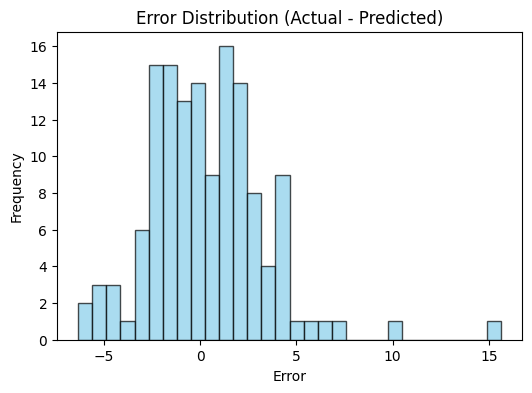

In [94]:
errors = y_test - yhat

# Plotting errors
plt.figure(figsize=(6, 4))

# Plotting error distribution
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Actual - Predicted)')
plt.show()